In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [2]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

100% 86.8M/86.8M [00:05<00:00, 22.8MB/s]
100% 86.8M/86.8M [00:05<00:00, 16.9MB/s]


In [3]:
!unzip brain-tumor-classification-mri.zip

Archive:  brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg  
  infl

In [4]:
from keras import optimizers
from keras.applications import InceptionResNetV2
from keras.models import Model
from keras import applications

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D, Flatten, MaxPooling2D,Activation
from keras.optimizers import SGD,Adam,RMSprop
from keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg


In [15]:
img_width, img_height = 150,150
train_data_dir = r"/content/Training"
validation_data_dir=r"/content/Testing"
nb_train_samples =100
nb_validation_samples =100
epochs =30
batch_size= 32


In [16]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

In [17]:

train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)
test_datagen=ImageDataGenerator ( rescale=1. /255)

In [18]:
train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), class_mode='categorical', batch_size=batch_size,classes=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'])

Found 2870 images belonging to 4 classes.


In [19]:
train_generator.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [20]:
test_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height),class_mode='categorical', batch_size=batch_size)

Found 394 images belonging to 4 classes.


In [21]:
test_generator.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [22]:

#DECLARE THE MODEL
model=Sequential()

#BLOCK-1
model.add(Conv2D(64,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#BLOCK-2
model.add(Conv2D(128,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#BLOCK-3
model.add(Conv2D(256,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#BLOCK-4
model.add(Conv2D(512,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#CLASSIFICATION
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

#FINAL OUTPUT LAYER
model.add(Dense(4, activation='softmax'))

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
training=model.fit_generator(train_generator,steps_per_epoch=train_generator.samples // batch_size,epochs=50,validation_data=test_generator,validation_steps=test_generator.samples // batch_size)

<ipython-input-24-2d88995fb972>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training=model.fit_generator(train_generator,steps_per_epoch=train_generator.samples // batch_size,epochs=50,validation_data=test_generator,validation_steps=test_generator.samples // batch_size)


Epoch 1/50
89/89 [==============================] - 29s 268ms/step - loss: 1.2552 - accuracy: 0.4056 - val_loss: 1.7359 - val_accuracy: 0.2370
Epoch 2/50
89/89 [==============================] - 26s 297ms/step - loss: 1.0302 - accuracy: 0.5328 - val_loss: 1.8391 - val_accuracy: 0.2865
Epoch 3/50
89/89 [==============================] - 22s 252ms/step - loss: 0.8567 - accuracy: 0.6166 - val_loss: 1.6643 - val_accuracy: 0.3828
Epoch 4/50
89/89 [==============================] - 24s 273ms/step - loss: 0.7726 - accuracy: 0.6508 - val_loss: 1.8166 - val_accuracy: 0.3646
Epoch 5/50
89/89 [==============================] - 23s 258ms/step - loss: 0.6871 - accuracy: 0.7061 - val_loss: 2.4071 - val_accuracy: 0.3750
Epoch 6/50
89/89 [==============================] - 22s 251ms/step - loss: 0.6040 - accuracy: 0.7491 - val_loss: 2.2985 - val_accuracy: 0.3620
Epoch 7/50
89/89 [==============================] - 22s 241ms/step - loss: 0.5538 - accuracy: 0.7671 - val_loss: 2.0793 - val_accuracy: 0.4583

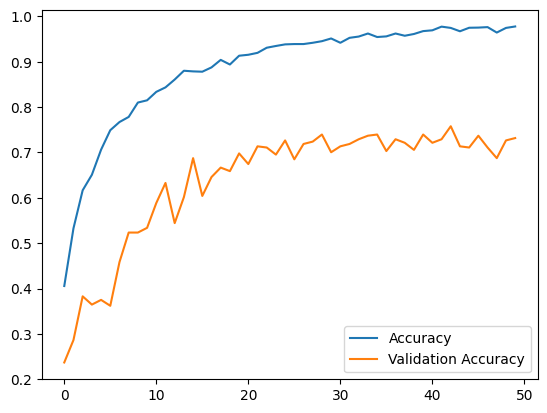

In [25]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.show()

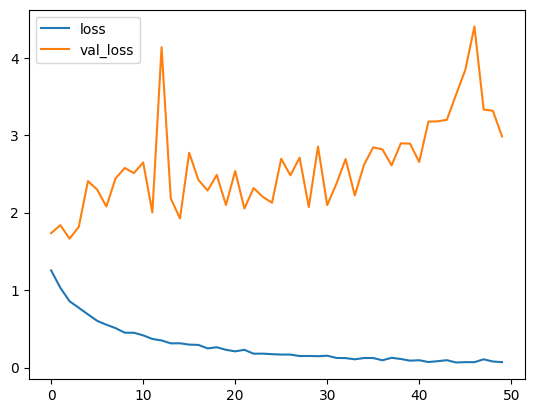

In [26]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [29]:
def prediction(a):
  img_pred = image.load_img(a,target_size=(150,150))
  img_pred=image.img_to_array(img_pred)
  img_pred=np.expand_dims(img_pred, axis=0)
  result=model.predict(img_pred)
  print(result)

  max=np.argmax(result)

  if max==0:
    print("Glioma_Tumor")
  elif max==1:
    print("Meningioma_Tumor")
  elif max==2:
    print("No_Tumor")
  else:
    print("Pituitary_Tumor")


  img=mpimg.imread(a)
  imgplot = plt.imshow(img)
  plt.show()

1/1 [==============================] - 0s 443ms/step
[[0.0000000e+00 1.3754263e-30 1.0000000e+00 0.0000000e+00]]
No_Tumor


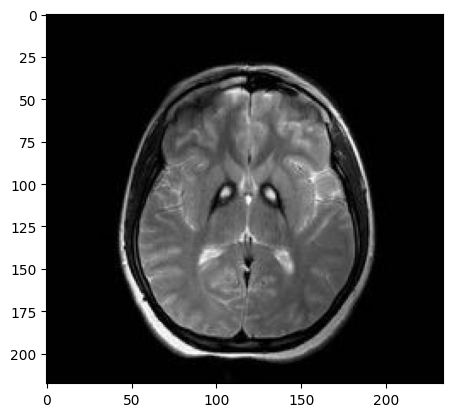

In [30]:
prediction("/content/Testing/no_tumor/image(48).jpg")